<a href="https://colab.research.google.com/github/aswin-ar3669/RLA-Python-Learning/blob/main/RL_Unit_2_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

# Environment Setup
grid_size = 4
goal_state = (3, 3)  # Goal is at the bottom-right corner
step_penalty = -1
goal_reward = 10

# Possible Actions
actions = ['up', 'down', 'left', 'right']

# Helper Functions
def move(state, action):
    """Move the agent based on the action, ensuring it stays within bounds."""
    x, y = state
    if action == 'up': x -= 1
    elif action == 'down': x += 1
    elif action == 'left': y -= 1
    elif action == 'right': y += 1

    # Make sure the state is within bounds
    x = max(0, min(x, grid_size - 1))
    y = max(0, min(y, grid_size - 1))

    return (x, y)

def choose_action(state):
    """Choose the action that moves the agent closer to the goal."""
    x, y = state
    goal_x, goal_y = goal_state

    # Move toward the goal (simple strategy: move row-wise, then column-wise)
    if x < goal_x:
        return 'down'
    elif x > goal_x:
        return 'up'
    elif y < goal_y:
        return 'right'
    elif y > goal_y:
        return 'left'
    return random.choice(actions)  # Random action if already at goal

# Run Simulation
state = (0, 0)  # Start at the top-left corner
steps = 0

while state != goal_state:
    action = choose_action(state)  # Choose an action
    state = move(state, action)  # Move to the new state
    steps += 1
    print(f"Step {steps}: Moved {action} to {state}")

# End of Simulation
print(f"Goal reached in {steps} steps!")


Step 1: Moved down to (1, 0)
Step 2: Moved down to (2, 0)
Step 3: Moved down to (3, 0)
Step 4: Moved right to (3, 1)
Step 5: Moved right to (3, 2)
Step 6: Moved right to (3, 3)
Goal reached in 6 steps!


Episode: 0, Step: 0, Action: 0, Reward: 1.0, State: [-0.00390244 -0.19512195  0.00585366  0.29268293], Terminated: False
Episode: 0, Step: 1, Action: 0, Reward: 1.0, State: [-0.01170898 -0.39032687  0.01759778  0.58720626], Terminated: False
Episode: 0, Step: 2, Action: 0, Reward: 1.0, State: [-0.02342279 -0.5856908   0.03530539  0.88538026], Terminated: False
Episode: 0, Step: 3, Action: 0, Reward: 1.0, State: [-0.03904827 -0.78127384  0.05908438  1.18894962], Terminated: False
Episode: 0, Step: 4, Action: 0, Reward: 1.0, State: [-0.05859046 -0.97710977  0.08907541  1.49955163], Terminated: False
Episode: 0, Step: 5, Action: 0, Reward: 1.0, State: [-0.08205434 -1.17319375  0.12544872  1.81866507], Terminated: False
Episode: 0, Step: 6, Action: 0, Reward: 1.0, State: [-0.10944369 -1.36946743  0.16839966  2.14754726], Terminated: False
Episode: 0, Step: 7, Action: 0, Reward: 0.0, State: [-0.14075972 -1.56580139  0.21814282  2.48715809], Terminated: True
Episode 0 Total Reward: 7.0
Episo

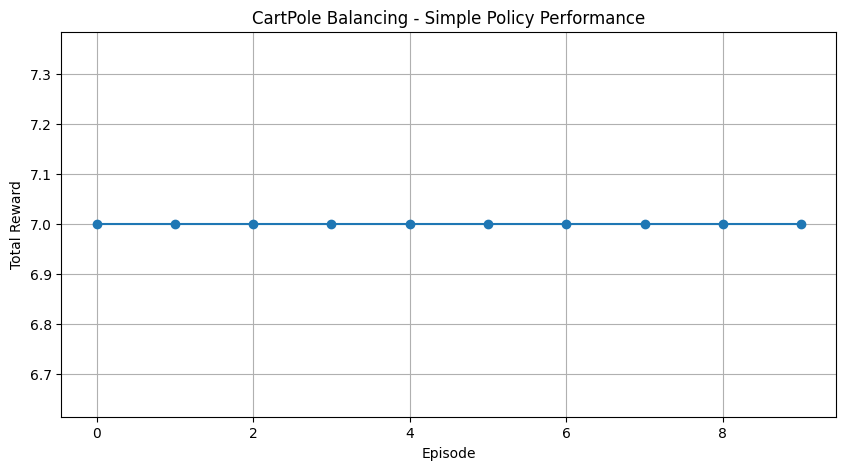

Done


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants
GRAVITY = 9.8
CART_MASS = 1.0
POLE_MASS = 0.1
TOTAL_MASS = CART_MASS + POLE_MASS
POLE_LENGTH = 0.5  # Half the pole's length
POLE_MASS_LENGTH = POLE_MASS * POLE_LENGTH
FORCE_MAGNITUDE = 10.0
TAU = 0.02  # Seconds between state updates
SCREEN_WIDTH = 600

# Initial conditions
state = np.array([0.0, 0.0, 0.0, 0.0])  # cart_position, cart_velocity, pole_angle, pole_angular_velocity
theta_threshold_radians = 12 * 2 * math.pi / 360
x_threshold = 2.4  # Cart position threshold

def reset():
    global state
    state = np.array([0.0, 0.0, 0.0, 0.0])
    return state

def step(action):
    global state

    x, x_dot, theta, theta_dot = state
    force = FORCE_MAGNITUDE if action == 1 else -FORCE_MAGNITUDE
    cos_theta = math.cos(theta)
    sin_theta = math.sin(theta)

    # Equations of motion
    temp = (force + POLE_MASS_LENGTH * theta_dot ** 2 * sin_theta) / TOTAL_MASS
    theta_acceleration = (GRAVITY * sin_theta - cos_theta * temp) / (
                POLE_LENGTH * (4.0 / 3.0 - POLE_MASS * cos_theta ** 2 / TOTAL_MASS))
    x_acceleration = temp - POLE_MASS_LENGTH * theta_acceleration * cos_theta / TOTAL_MASS

    # Update state
    x_dot = x_dot + TAU * x_acceleration
    x = x + TAU * x_dot
    theta_dot = theta_dot + TAU * theta_acceleration
    theta = theta + TAU * theta_dot
    state = np.array([x, x_dot, theta, theta_dot])  # Update the state

    # Check termination conditions
    terminated = bool(
        x < -x_threshold
        or x > x_threshold
        or theta < -theta_threshold_radians
        or theta > theta_threshold_radians
    )

    truncated = False  # No time limits in this environment

    # Reward
    reward = 1.0 if not terminated else 0.0  # Reward of 1 per step, 0 if terminated

    return state, reward, terminated, truncated, {}  # Return as a tuple

# Simple Policy (Example: Apply force to the right if the pole is leaning left)
def simple_policy(state):
    angle = state[2]
    return 1 if angle < 0 else 0  # Push right if pole leans left, else push left

# Main Loop
num_episodes = 10
num_steps = 200
episode_rewards = []  # Store rewards for plotting

for episode in range(num_episodes):
    state = reset()
    total_reward = 0
    for step_num in range(num_steps):
        action = simple_policy(state)
        state, reward, terminated, truncated, _ = step(action)
        total_reward += reward

        print(f"Episode: {episode}, Step: {step_num}, Action: {action}, Reward: {reward}, State: {state}, Terminated: {terminated}")

        if terminated:
            break
    episode_rewards.append(total_reward)  # Store total reward per episode
    print(f"Episode {episode} Total Reward: {total_reward}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(num_episodes), episode_rewards, marker='o', linestyle='-')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("CartPole Balancing - Simple Policy Performance")
plt.grid()
plt.show()

print("Done")


In [3]:
import random  # Make sure to import the random module

# Define the suits and ranks of the cards
suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']

# Define card deck
deck = [f"{rank} of {suit}" for suit in suits for rank in ranks]

# Shuffle the deck
random.shuffle(deck)

# Function to deal cards
def deal_hand():
    return [deck.pop() for _ in range(5)]

# Function to display a hand
def show_hand(player_name, hand):
    print(f"{player_name}'s hand: ", ", ".join(hand))

# Function to simulate drawing cards
def draw_cards(hand, num_cards):
    print(f"Drawing {num_cards} new cards...")
    for _ in range(num_cards):
        hand.append(deck.pop())
    return hand

# Function to simulate a simple bet
def bet():
    return random.choice([0, 10, 20])  # Player can either fold (0), bet (10), or raise (20)

# Player's turn (simplified)
def player_turn(hand):
    show_hand('Player', hand)
    print("Do you want to draw cards? (1 for Yes, 0 for No)")
    draw_choice = int(input())
    if draw_choice == 1:
        num_cards = int(input("How many cards do you want to draw? (1 to 3): "))
        hand = draw_cards(hand, num_cards)
        show_hand('Player', hand)
    return hand

# Computer's turn (simplified)
def computer_turn(hand):
    print("\nComputer's turn:")
    show_hand('Computer', hand)
    num_cards = random.randint(0, 3)  # Randomly decide how many cards to draw
    hand = draw_cards(hand, num_cards)
    show_hand('Computer', hand)
    return hand

# Main game loop
def play_game():
    # Deal hands to player and computer
    player_hand = deal_hand()
    computer_hand = deal_hand()

    # Player's turn
    player_hand = player_turn(player_hand)

    # Computer's turn
    computer_hand = computer_turn(computer_hand)

    # Simulate betting
    player_bet = bet()
    computer_bet = bet()

    print(f"\nPlayer's bet: {player_bet}, Computer's bet: {computer_bet}")

    # Determine the winner (simplified logic: higher card value wins)
    player_score = sum([ranks.index(card.split()[0]) for card in player_hand])  # Total card score
    computer_score = sum([ranks.index(card.split()[0]) for card in computer_hand])

    if player_score > computer_score:
        print("Player wins!")
    elif computer_score > player_score:
        print("Computer wins!")
    else:
        print("It's a tie!")

# Start the game
play_game()


Player's hand:  K of Hearts, Q of Spades, J of Spades, 8 of Hearts, J of Hearts
Do you want to draw cards? (1 for Yes, 0 for No)
1
How many cards do you want to draw? (1 to 3): 3
Drawing 3 new cards...
Player's hand:  K of Hearts, Q of Spades, J of Spades, 8 of Hearts, J of Hearts, 6 of Hearts, 3 of Clubs, 5 of Hearts

Computer's turn:
Computer's hand:  4 of Diamonds, 10 of Clubs, 9 of Hearts, 2 of Hearts, 10 of Spades
Drawing 3 new cards...
Computer's hand:  4 of Diamonds, 10 of Clubs, 9 of Hearts, 2 of Hearts, 10 of Spades, 5 of Spades, 7 of Hearts, 4 of Hearts

Player's bet: 0, Computer's bet: 0
Player wins!


Optimal Value Function:
  V(high) = 7.867
  V(low) = 7.081

Optimal Policy:
  π(high) = search
  π(low) = recharge


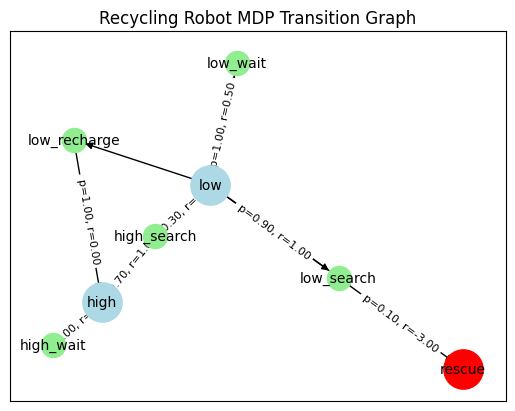

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the environment
class RecyclingRobotMDP:
    def __init__(self, alpha=0.7, beta=0.9, r_search=1, r_wait=0.5, rescue_cost=-3):
        """
        Initializes the Recycling Robot MDP.

        Args:
            alpha (float): Probability of remaining in 'high' state after searching from 'high' state.
            beta (float): Probability of remaining in 'low' state after searching from 'low' state.
            r_search (float): Reward for searching and finding a can.
            r_wait (float): Reward for waiting and having a can brought.
            rescue_cost (float): Cost (negative reward) for needing rescue (battery depletion).
        """

        self.alpha = alpha
        self.beta = beta
        self.r_search = r_search
        self.r_wait = r_wait
        self.rescue_cost = rescue_cost

        # Define states
        self.states = ['high', 'low']
        self.n_states = len(self.states)

        # Define actions
        self.actions = {'high': ['search', 'wait'], 'low': ['search', 'wait', 'recharge']}

        # Create a mapping from state/action to index
        self.state_index = {s: i for i, s in enumerate(self.states)}
        self.action_index = {s: {a: i for i, a in enumerate(self.actions[s])} for s in self.states}

        #Define transitions from table 3.1
        self.transitions = {
            ('high', 'search', 'high'): (self.alpha, self.r_search),
            ('high', 'search', 'low'): (1 - self.alpha, self.r_search),
            ('high', 'wait', 'high'): (1, self.r_wait),
            ('high', 'wait', 'low'): (0, self.r_wait),
            ('low', 'search', 'low'): (self.beta, self.r_search),
            ('low', 'search', None): (1 - self.beta, self.rescue_cost), #None represents the "rescue" state
            ('low', 'wait', 'low'): (1, self.r_wait),
            ('low', 'recharge', 'high'): (1, 0),
            ('low', 'recharge', 'low'): (0, 0)
        }


    def transition_probability(self, state, action, next_state):
        """
        Calculates the probability of transitioning from 'state' to 'next_state' given 'action'.

        Args:
            state (str): Current state ('high' or 'low').
            action (str): Action taken ('search', 'wait', or 'recharge').
            next_state (str): Potential next state ('high' or 'low').  Can be None for rescue

        Returns:
            float: Transition probability.
        """
        try:
            return self.transitions[(state, action, next_state)][0]
        except KeyError:
            return 0.0

    def reward(self, state, action, next_state):
        """
        Calculates the reward for transitioning from 'state' to 'next_state' given 'action'.

        Args:
            state (str): Current state ('high' or 'low').
            action (str): Action taken ('search', 'wait', or 'recharge').
            next_state (str): The next state ('high' or 'low').  Can be None for rescue

        Returns:
            float: Reward value.
        """
        try:
            return self.transitions[(state, action, next_state)][1]
        except KeyError:
            return 0.0


    def is_terminal(self, state):
        """In this example, there are no terminal states"""
        return False


def value_iteration(mdp, gamma=0.9, epsilon=0.001):
    """
    Performs value iteration to find the optimal value function and policy.

    Args:
        mdp (RecyclingRobotMDP): The MDP object.
        gamma (float): Discount factor.
        epsilon (float): Tolerance for convergence.

    Returns:
        tuple: (value_function, policy)
    """

    value_function = {s: 0 for s in mdp.states}  # Initialize value function to 0
    policy = {s: None for s in mdp.states}      # Initialize policy to None

    while True:
        delta = 0
        for state in mdp.states:
            v = value_function[state]
            max_q = float('-inf') #start q value at negative infinity
            best_action = None

            for action in mdp.actions[state]:
                q_value = 0
                for next_state in mdp.states + [None]: #Include "None" (rescue) as possible next state
                    p = mdp.transition_probability(state, action, next_state)
                    r = mdp.reward(state, action, next_state)
                    q_value += p * (r + gamma * value_function.get(next_state, 0)) #Value of rescue is 0

                if q_value > max_q:
                    max_q = q_value
                    best_action = action

            value_function[state] = max_q
            policy[state] = best_action
            delta = max(delta, abs(v - value_function[state])) #Check for the biggest change across all states

        if delta < epsilon:
            break

    return value_function, policy


def create_transition_graph(mdp):
    """
    Creates a directed graph representing the MDP's transitions.

    Args:
        mdp (RecyclingRobotMDP): The MDP object.

    Returns:
        networkx.DiGraph: A directed graph representing the MDP.
    """

    graph = nx.DiGraph()

    # Add state nodes
    for state in mdp.states:
        graph.add_node(state, type='state')

    # Add action nodes and transitions
    for state in mdp.states:
        for action in mdp.actions[state]:
            action_node = f"{state}_{action}"  # Unique name for action node
            graph.add_node(action_node, type='action')
            graph.add_edge(state, action_node)  # Edge from state to action

            for next_state in mdp.states + [None]:
                p = mdp.transition_probability(state, action, next_state)
                r = mdp.reward(state, action, next_state)
                if p > 0:  # Only add edges with non-zero probability
                    label = f"p={p:.2f}, r={r:.2f}"
                    graph.add_edge(action_node, next_state if next_state else "rescue", label=label) # Edge from action to next state

    return graph


def draw_transition_graph(graph):
    """
    Draws the transition graph using matplotlib.

    Args:
        graph (networkx.DiGraph): The transition graph.
    """

    pos = nx.spring_layout(graph)  # You can experiment with different layouts

    # Separate nodes by type for coloring
    state_nodes = [node for node, data in graph.nodes(data=True) if data.get('type') == 'state']
    action_nodes = [node for node, data in graph.nodes(data=True) if data.get('type') == 'action']

    # Draw nodes
    nx.draw_networkx_nodes(graph, pos, nodelist=state_nodes, node_color='lightblue', node_size=800)
    nx.draw_networkx_nodes(graph, pos, nodelist=action_nodes, node_color='lightgreen', node_size=300)
    nx.draw_networkx_nodes(graph, pos, nodelist=['rescue'], node_color='red', node_size=800)  # Rescue node

    # Draw edges with labels
    edges = graph.edges()
    labels = nx.get_edge_attributes(graph, 'label')
    nx.draw_networkx_edges(graph, pos, edgelist=edges, width=1, arrows=True)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_size=8)

    # Draw node labels
    node_labels = {node: node for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=10)

    plt.title("Recycling Robot MDP Transition Graph")
    plt.show()


# Example usage:
if __name__ == '__main__':
    env = RecyclingRobotMDP()
    value_function, policy = value_iteration(env)

    print("Optimal Value Function:")
    for state, value in value_function.items():
        print(f"  V({state}) = {value:.3f}")

    print("\nOptimal Policy:")
    for state, action in policy.items():
        print(f"  π({state}) = {action}")

    # Create and draw the transition graph
    transition_graph = create_transition_graph(env)
    draw_transition_graph(transition_graph)


In [5]:
import numpy as np

# Define grid size for the golf course (simple 2D grid representation)
GRID_SIZE = 10
HOLE_POSITION = (9, 9)  # Hole is at bottom-right corner

# Define the clubs
CLUBS = {
    "putter": 1,   # Moves the ball 1 step per stroke
    "driver": 3    # Moves the ball 3 steps per stroke
}

# Initialize value function (negative strokes needed to reach the hole)
values = np.full((GRID_SIZE, GRID_SIZE), -np.inf)  # Large negative values
values[HOLE_POSITION] = 0  # Terminal state (hole)

# Value iteration to estimate the number of strokes
for step in range(10):  # Iterate to update values
    new_values = values.copy()

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) == HOLE_POSITION:
                continue  # Skip hole

            possible_values = []

            # Try both clubs (putter and driver)
            for club, move in CLUBS.items():
                # Move in 4 directions: up, down, left, right
                for dx, dy in [(move, 0), (-move, 0), (0, move), (0, -move)]:
                    ni, nj = i + dx, j + dy  # New position

                    # Ensure new position is within the grid
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE:
                        possible_values.append(values[ni, nj] - 1)  # Add penalty (-1)

            # Update value function (best possible move)
            if possible_values:
                new_values[i, j] = max(possible_values)

    values = new_values  # Update values for the next iteration

# Print final value function
print("Value function (negative strokes to reach hole):")
print(np.round(values, 1))


Value function (negative strokes to reach hole):
[[-6. -7. -6. -5. -6. -5. -4. -5. -4. -3.]
 [-7. -8. -7. -6. -7. -6. -5. -6. -5. -4.]
 [-6. -7. -6. -5. -6. -5. -4. -5. -4. -3.]
 [-5. -6. -5. -4. -5. -4. -3. -4. -3. -2.]
 [-6. -7. -6. -5. -6. -5. -4. -5. -4. -3.]
 [-5. -6. -5. -4. -5. -4. -3. -4. -3. -2.]
 [-4. -5. -4. -3. -4. -3. -2. -3. -2. -1.]
 [-5. -6. -5. -4. -5. -4. -3. -4. -3. -2.]
 [-4. -5. -4. -3. -4. -3. -2. -3. -2. -1.]
 [-3. -4. -3. -2. -3. -2. -1. -2. -1.  0.]]


In [6]:
import numpy as np

# Define grid size and hole position
GRID_SIZE = 10
HOLE_POSITION = (9, 9)  # Hole is at bottom-right

# Define clubs
CLUBS = {
    "putter": 1,   # Moves 1 step per stroke
    "driver": 3    # Moves 3 steps per stroke
}

# Initialize action-value function (negative strokes to hole)
q_values = np.full((GRID_SIZE, GRID_SIZE), -np.inf)  # Large negative values
q_values[HOLE_POSITION] = 0  # Terminal state (hole)

# Compute optimal action-value function using driver first
for step in range(10):  # Iterate to update values
    new_q_values = q_values.copy()

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) == HOLE_POSITION:
                continue  # Skip hole

            possible_values = []

            # Step 1: Use Driver First
            for dx, dy in [(CLUBS["driver"], 0), (-CLUBS["driver"], 0), (0, CLUBS["driver"]), (0, -CLUBS["driver"])]:
                ni, nj = i + dx, j + dy  # New position after driver

                if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE:
                    # Step 2: After Driver, Choose Best (Putter/Driver)
                    best_next_value = -np.inf
                    for club, move in CLUBS.items():
                        for dx2, dy2 in [(move, 0), (-move, 0), (0, move), (0, -move)]:
                            nni, nnj = ni + dx2, nj + dy2  # Next move

                            if 0 <= nni < GRID_SIZE and 0 <= nnj < GRID_SIZE:
                                best_next_value = max(best_next_value, q_values[nni, nnj] - 1)

                    possible_values.append(best_next_value)

            # Update q-value function (best choice after using driver first)
            if possible_values:
                new_q_values[i, j] = max(possible_values)

    q_values = new_q_values  # Update values for the next iteration

# Print final action-value function
print("Optimal action-value function q*(s, driver) (negative strokes to hole):")
print(np.round(q_values, 1))


Optimal action-value function q*(s, driver) (negative strokes to hole):
[[ -3. -inf  -3. -inf  -3. -inf  -2. -inf  -2. -inf]
 [-inf  -4. -inf  -3. -inf  -3. -inf  -3. -inf  -2.]
 [ -3. -inf  -3. -inf  -3. -inf  -2. -inf  -2. -inf]
 [-inf  -3. -inf  -2. -inf  -2. -inf  -2. -inf  -1.]
 [ -3. -inf  -3. -inf  -3. -inf  -2. -inf  -2. -inf]
 [-inf  -3. -inf  -2. -inf  -2. -inf  -2. -inf  -1.]
 [ -2. -inf  -2. -inf  -2. -inf  -1. -inf  -1. -inf]
 [-inf  -3. -inf  -2. -inf  -2. -inf  -3. -inf  -2.]
 [ -2. -inf  -2. -inf  -2. -inf  -1. -inf  -2. -inf]
 [-inf  -2. -inf  -1. -inf  -1. -inf  -2. -inf   0.]]


In [7]:
import numpy as np

# Grid size
GRID_SIZE = 4

# Actions: Up, Down, Left, Right
ACTIONS = ["up", "down", "left", "right"]
ACTION_EFFECTS = {
    "up": (-1, 0),
    "down": (1, 0),
    "left": (0, -1),
    "right": (0, 1)
}

# Initialize the grid
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Start and goal positions
start_pos = (0, 0)
goal_pos = (GRID_SIZE - 1, GRID_SIZE - 1)

# Place start (S) and goal (G) in the grid
grid[start_pos] = 1  # Start position marked as 1
grid[goal_pos] = 2   # Goal position marked as 2

# Display the GridWorld
def display_grid(grid):
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) == start_pos:
                print(" S ", end="")  # Start position
            elif (i, j) == goal_pos:
                print(" G ", end="")  # Goal position
            else:
                print(" . ", end="")  # Empty space
        print()

# Move function
def move(position, action):
    i, j = position
    di, dj = ACTION_EFFECTS[action]
    new_i, new_j = max(0, min(i + di, GRID_SIZE - 1)), max(0, min(j + dj, GRID_SIZE - 1))
    return (new_i, new_j)

# Example moves
position = start_pos
moves = ["right", "right", "down", "down", "down", "right", "right"]  # Sample path

print("Initial Grid:")
display_grid(grid)
print("\nMoving through Grid:")

for move_action in moves:
    position = move(position, move_action)
    print(f"Moved {move_action} → New Position: {position}")

# Check if goal reached
if position == goal_pos:
    print("\n🏆 Goal Reached!")
else:
    print("\n🚶 Still moving...")


Initial Grid:
 S  .  .  . 
 .  .  .  . 
 .  .  .  . 
 .  .  .  G 

Moving through Grid:
Moved right → New Position: (0, 1)
Moved right → New Position: (0, 2)
Moved down → New Position: (1, 2)
Moved down → New Position: (2, 2)
Moved down → New Position: (3, 2)
Moved right → New Position: (3, 3)
Moved right → New Position: (3, 3)

🏆 Goal Reached!


In [8]:
import numpy as np

# Gridworld size
grid_size = 4
num_states = grid_size * grid_size
actions = ["up", "down", "left", "right"]
arrow_mapping = {"up": "↑", "down": "↓", "left": "←", "right": "→"}

# Define transitions for a 4x4 Gridworld
def get_next_state(state, action):
    """Returns the next state given the current state and action."""
    row, col = divmod(state, grid_size)

    if action == "up":
        row = max(row - 1, 0)  # Move up, unless at top row
    elif action == "down":
        row = min(row + 1, grid_size - 1)  # Move down, unless at bottom row
    elif action == "left":
        col = max(col - 1, 0)  # Move left, unless at left edge
    elif action == "right":
        col = min(col + 1, grid_size - 1)  # Move right, unless at right edge

    return row * grid_size + col  # Convert (row, col) back to state index

# Define the policy (random uniform policy)
policy = {s: {a: 0.25 for a in actions} for s in range(num_states)}  # π(a|s) = 0.25 for all actions

# Define rewards (-1 for each step)
rewards = {s: -1 for s in range(num_states)}
rewards[0] = 0  # Terminal state (top-left)
rewards[num_states - 1] = 0  # Terminal state (bottom-right)

# Transition probabilities
transition_prob = {}
for s in range(num_states):
    for a in actions:
        s_next = get_next_state(s, a)
        transition_prob[(s, a, s_next)] = 1.0  # Deterministic transitions

# Iterative Policy Evaluation Function
def iterative_policy_evaluation(policy, transition_prob, rewards, theta=1e-4, gamma=1.0):
    """Performs iterative policy evaluation for a given policy in a gridworld."""
    V = {s: 0 for s in range(num_states)}  # Initialize V(s) = 0 for all states

    while True:
        delta = 0
        new_V = V.copy()

        for s in range(num_states):
            if s in [0, num_states - 1]:  # Skip terminal states
                continue

            v_s = 0
            for a, action_prob in policy[s].items():
                s_next = get_next_state(s, a)
                reward = rewards[s_next]
                v_s += action_prob * (reward + gamma * V[s_next])  # Bellman expectation equation

            delta = max(delta, abs(v_s - V[s]))
            new_V[s] = v_s

        V = new_V
        if delta < theta:
            break

    return V

# Run policy evaluation
V_pi = iterative_policy_evaluation(policy, transition_prob, rewards)

# Print final value function
print("Final State Values:")
for i in range(grid_size):
    print([round(V_pi[i * grid_size + j], 2) for j in range(grid_size)])

# Compute best actions for visualization (arrows)
print("\nPolicy Visualization (Random Policy):")
for i in range(grid_size):
    row = []
    for j in range(grid_size):
        s = i * grid_size + j
        if s in [0, num_states - 1]:  # Terminal states
            row.append("⬛")
        else:
            best_action = max(policy[s], key=policy[s].get)  # Random policy (equal prob)
            row.append(arrow_mapping[best_action])
    print(" ".join(row))


Final State Values:
[0, -13.0, -19.0, -21.0]
[-13.0, -17.0, -19.0, -19.0]
[-19.0, -19.0, -17.0, -13.0]
[-21.0, -19.0, -13.0, 0]

Policy Visualization (Random Policy):
⬛ ↑ ↑ ↑
↑ ↑ ↑ ↑
↑ ↑ ↑ ↑
↑ ↑ ↑ ⬛


In [9]:
import numpy as np

# Gridworld size
grid_size = 4
num_states = grid_size * grid_size
actions = ["up", "down", "left", "right"]

# Define transitions for a 4x4 Gridworld
def get_next_state(state, action):
    """Returns the next state given the current state and action."""
    row, col = divmod(state, grid_size)

    if action == "up":
        row = max(row - 1, 0)  # Move up, unless at top row
    elif action == "down":
        row = min(row + 1, grid_size - 1)  # Move down, unless at bottom row
    elif action == "left":
        col = max(col - 1, 0)  # Move left, unless at left edge
    elif action == "right":
        col = min(col + 1, grid_size - 1)  # Move right, unless at right edge

    return row * grid_size + col  # Convert (row, col) back to state index

# Define rewards (-1 per step, 0 at terminal states)
rewards = {s: -1 for s in range(num_states)}
rewards[0] = 0  # Terminal state (top-left)
rewards[num_states - 1] = 0  # Terminal state (bottom-right)

# Transition probabilities
transition_prob = {}
for s in range(num_states):
    for a in actions:
        s_next = get_next_state(s, a)
        transition_prob[(s, a, s_next)] = 1.0  # Deterministic transitions

# Initialize a random policy (each action has equal probability)
policy = {s: {a: 1 / len(actions) for a in actions} for s in range(num_states)}

# Policy Evaluation Function
def policy_evaluation(policy, transition_prob, rewards, theta=1e-4, gamma=1.0):
    """Evaluates the given policy and computes state values."""
    V = {s: 0 for s in range(num_states)}  # Initialize V(s) = 0 for all states

    while True:
        delta = 0
        new_V = V.copy()

        for s in range(num_states):
            if s in [0, num_states - 1]:  # Skip terminal states
                continue

            expected_value = 0
            for a, action_prob in policy[s].items():
                s_next = get_next_state(s, a)
                reward = rewards[s_next]
                expected_value += action_prob * (reward + gamma * V[s_next])

            delta = max(delta, abs(expected_value - V[s]))
            new_V[s] = expected_value

        V = new_V
        if delta < theta:
            break

    return V

# Policy Improvement Function
def policy_improvement(V, transition_prob, rewards, gamma=1.0):
    """Improves the policy using a greedy approach."""
    new_policy = {}

    for s in range(num_states):
        if s in [0, num_states - 1]:  # Terminal states keep the same policy
            new_policy[s] = {a: 1 / len(actions) for a in actions}
            continue

        # Compute action values
        action_values = {}
        for a in actions:
            s_next = get_next_state(s, a)
            reward = rewards[s_next]
            action_values[a] = reward + gamma * V[s_next]

        # Find the best action (greedy selection)
        best_action = max(action_values, key=action_values.get)

        # Update policy to be deterministic (1 for best action, 0 otherwise)
        new_policy[s] = {a: 1.0 if a == best_action else 0.0 for a in actions}

    return new_policy

# Policy Iteration Function
def policy_iteration(transition_prob, rewards, gamma=1.0):
    """Performs Policy Iteration (Evaluation + Improvement) until convergence."""
    policy = {s: {a: 1 / len(actions) for a in actions} for s in range(num_states)}  # Start with a random policy

    while True:
        V = policy_evaluation(policy, transition_prob, rewards, gamma=gamma)
        new_policy = policy_improvement(V, transition_prob, rewards, gamma=gamma)

        if new_policy == policy:  # Converged
            break

        policy = new_policy  # Update policy

    return policy, V

# Run Policy Iteration
optimal_policy, optimal_values = policy_iteration(transition_prob, rewards)

# Print final policy and state values
print("Final State Values (Optimal Policy):")
for i in range(grid_size):
    print([round(optimal_values[i * grid_size + j], 2) for j in range(grid_size)])

print("\nOptimal Policy (Arrows indicate best actions):")
arrow_mapping = {"up": "↑", "down": "↓", "left": "←", "right": "→"}
for i in range(grid_size):
    row = []
    for j in range(grid_size):
        s = i * grid_size + j
        if s in [0, num_states - 1]:  # Terminal states
            row.append("⬛")
        else:
            best_action = max(optimal_policy[s], key=optimal_policy[s].get)
            row.append(arrow_mapping[best_action])
    print(" ".join(row))


Final State Values (Optimal Policy):
[0, 0.0, -1.0, -2.0]
[0.0, -1.0, -2.0, -1.0]
[-1.0, -2.0, -1.0, 0.0]
[-2.0, -1.0, 0.0, 0]

Optimal Policy (Arrows indicate best actions):
⬛ ← ← ↓
↑ ↑ ↑ ↓
↑ ↑ ↓ ↓
↑ → → ⬛


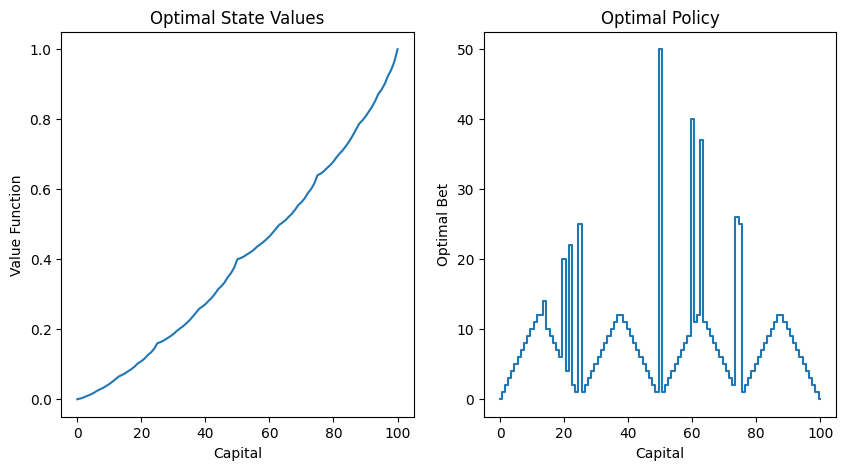

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Gambler's problem parameters
goal = 100  # Final winning amount
p_heads = 0.4  # Probability of heads
gamma = 1.0  # No discounting

# Value Iteration
def value_iteration_gambler(goal, p_heads, theta=1e-9):
    """Performs Value Iteration for the Gambler's Problem."""
    V = np.zeros(goal + 1)  # Initialize V(s) = 0 for all states
    V[goal] = 1  # Terminal state reward

    while True:
        delta = 0
        new_V = V.copy()

        for s in range(1, goal):
            action_values = [
                p_heads * V[s + a] + (1 - p_heads) * V[s - a]
                for a in range(1, min(s, goal - s) + 1)
            ]
            if action_values:
                new_V[s] = max(action_values)
                delta = max(delta, abs(new_V[s] - V[s]))

        V = new_V
        if delta < theta:
            break

    # Extract optimal policy
    policy = np.zeros(goal + 1)
    for s in range(1, goal):
        action_values = {
            a: p_heads * V[s + a] + (1 - p_heads) * V[s - a]
            for a in range(1, min(s, goal - s) + 1)
        }
        if action_values:
            policy[s] = max(action_values, key=action_values.get)
    return V, policy
# Run Value Iteration
V_opt, policy_opt = value_iteration_gambler(goal, p_heads)
# Plot Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(V_opt)
plt.xlabel("Capital")
plt.ylabel("Value Function")
plt.title("Optimal State Values")
plt.subplot(1, 2, 2)
plt.step(range(goal + 1), policy_opt, where='mid')
plt.xlabel("Capital")
plt.ylabel("Optimal Bet")
plt.title("Optimal Policy")
plt.show()
